#### Import necessary libraries

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from sklearn.metrics import classification_report
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from src.model import SoftmaxClassifier
from utils.visualization import show_images
from src.data_processing import get_data_loaders
from src.train import train_model
from src.evaluation import evaluate_model


#### Downloads and preprocesses the CIFAR10 dataset, then splits it into train, validation, and test sets with specified sizes

In [16]:
# Set up data loaders
train_loader, val_loader, test_loader = get_data_loaders()


Files already downloaded and verified


 #### Prints the shape of the images, and displays them in a 16x8 grid using matplotlib

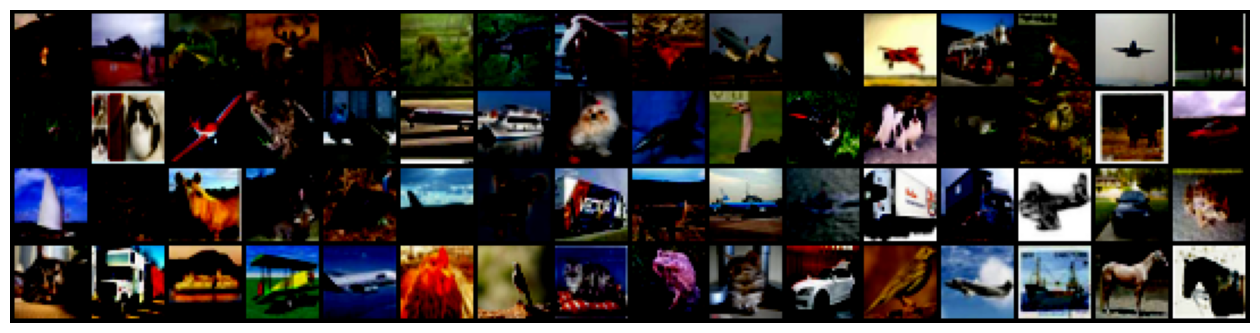

In [17]:
for images, _ in train_loader:
  show_images(images)
  break

#### Define Softmax Classifier

In [ ]:
# Define Softmax Classifier
n_input = 32 * 32 * 3  # CIFAR10 images have a size of 32x32 pixels and 3 channels (RGB)
n_output = 10  # Number of CIFAR10 classes
model = SoftmaxClassifier(n_input, n_output)

# Train the model
model, training_losses = train_model(model, train_loader)

Epoch 10/200, Loss: 1.7713159952564692
Epoch 20/200, Loss: 1.7297548620094982
Epoch 30/200, Loss: 1.7063707830265191
Epoch 40/200, Loss: 1.690520631111954
Epoch 50/200, Loss: 1.6786230791639367
Epoch 60/200, Loss: 1.6691771427499746
Epoch 70/200, Loss: 1.6616387077397794
Epoch 80/200, Loss: 1.6550404650637611
Epoch 90/200, Loss: 1.6495559657949417
Epoch 100/200, Loss: 1.6448167148412254
Epoch 110/200, Loss: 1.640344826351354
Epoch 120/200, Loss: 1.6363799731081974


#### Define function to evaluate the accuracy of a PyTorch model on a given DataLoader using the specified input size

In [ ]:
# Evaluate the model
accuracy_val = evaluate_model(model, val_loader, n_input)
print(f'Validation Accuracy: {accuracy_val * 100:.2f}%')

# Evaluate on the test set
test_accuracy = evaluate_model(model, test_loader, n_input)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Generate classification report
classification_report_test = generate_classification_report(model, test_loader, n_input)
print("\nClassification Report:")
print(classification_report_test)
